In [1]:
# 환경변수 초기화 (기존 PYTHON 경로 제거)
Sys.unsetenv("RETICULATE_PYTHON")

# 원하는 conda 환경 지정 (R 시작 직후 해야 함)
library(reticulate)
use_condaenv("phate_env", required = TRUE)

# 확인
py_config()


python:         /home/stl/anaconda3/envs/phate_env/bin/python
libpython:      /home/stl/anaconda3/envs/phate_env/lib/libpython3.10.so
pythonhome:     /home/stl/anaconda3/envs/phate_env:/home/stl/anaconda3/envs/phate_env
version:        3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
numpy:          /home/stl/anaconda3/envs/phate_env/lib/python3.10/site-packages/numpy
numpy_version:  2.2.6

NOTE: Python version was forced by use_python() function

In [2]:
library(phateR)
library(Seurat)
library(BiocManager)
library(ggplot2)
library(SingleCellExperiment)
library(slingshot)

Loading required package: Matrix

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.4.3 but the current version is
4.5.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Bioconductor version '3.20' requires R version '4.4'; use `version = '3.22'`
  with R version 4.5; see https://bioconductor.org/install

Bioconductor version '3.20' is out-of-date; the current release version '3.22'
  is available with R version '4.5'; see https://bioconductor.org/install

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, co

In [3]:
# 2. 데이터 준비
counts <- as.matrix(GetAssayData(msc, assay = "RNA", slot = "data"))
hvg <- VariableFeatures(msc)
counts_hvg <- counts[hvg, ]

# 3. PHATE
phate_result <- phate(counts_hvg)

# 4. cluster 정보
clust <- Idents(msc)

# 5. SCE 만들기
sce <- SingleCellExperiment(
    assays = List(counts = counts_hvg),
    reducedDims = SimpleList(PHATE = phate_result$embedding),
    colData = DataFrame(cluster = clust)
)

# 6. Slingshot
sce <- slingshot(sce, clusterLabels = 'cluster', reducedDim = 'PHATE')
pseudotime <- slingPseudotime(sce)

# 7. 시각화
colors <- viridis::viridis(100)[cut(pseudotime[,1], breaks=100)]
plot(reducedDims(sce)$PHATE, col = colors, pch = 16, asp = 1)
lines(SlingshotDataSet(sce), lwd = 2)

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
“non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor.”


ERROR: Error in .set_internal_all(x, value, getfun = int_colData, setfun = `int_colData<-`, : invalid 'value' in 'reducedDims(<SingleCellExperiment>) <- value'
each element of 'value' should have number of rows equal to 'ncol(x)'


In [6]:
dim(counts_hvg)
dim(phate_result$embedding)  # 결과: (cell 수, 2)
phate_result <- phate(t(counts_hvg))

[1]  2000 11182

[1] 2000    2

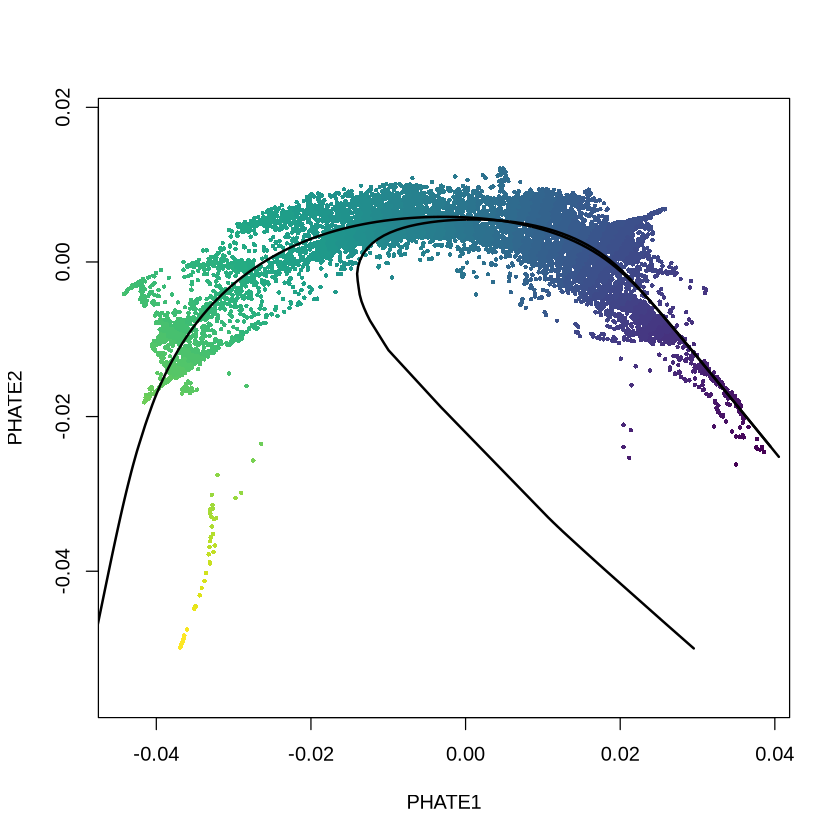

In [8]:
# 5. SCE 만들기
sce <- SingleCellExperiment(
    assays = List(counts = counts_hvg),
    reducedDims = SimpleList(PHATE = phate_result$embedding),
    colData = DataFrame(cluster = clust)
)

# 6. Slingshot
sce <- slingshot(sce, clusterLabels = 'cluster', reducedDim = 'PHATE')
pseudotime <- slingPseudotime(sce)

# 7. 시각화
colors <- viridis::viridis(100)[cut(pseudotime[,1], breaks=100)]
plot(reducedDims(sce)$PHATE, col = colors, pch = 16, asp = 1, cex=0.5)
lines(SlingshotDataSet(sce), lwd = 2)

In [ ]:
genes <- c("Acan", "Sox9", "Pdgfra", "Cd34")

par(mfrow = c(1, length(genes)))

for (g in genes) {
  expr <- GetAssayData(msc, assay = "RNA", slot = "data")[g, ]
  colors <- viridis(100)[cut(expr, 100)]
  
  plot(phate_result$embedding,
       col = colors,
       pch = 16,
       main = g, xlab = "PHATE1", ylab = "PHATE2")
}

ERROR: Error: unable to find an inherited method for function ‘slingCurveWeights’ for signature ‘x = "missing"’
